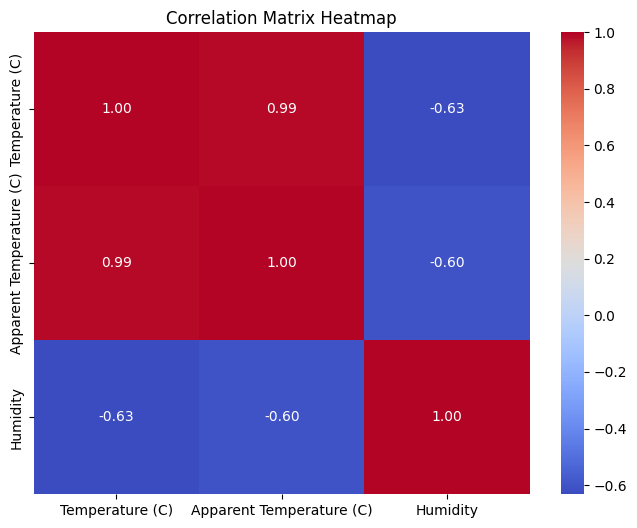

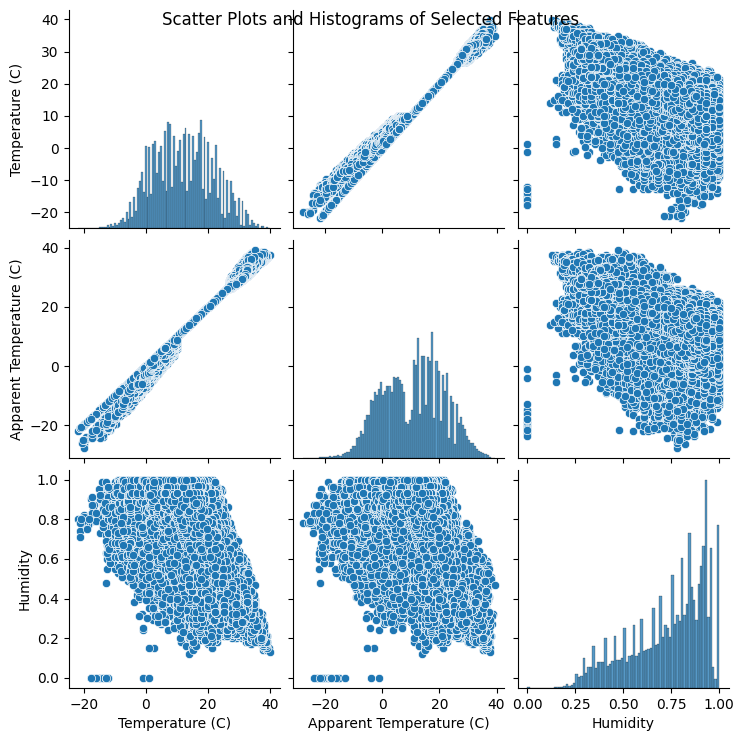

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/weatherHistory.csv'
data = pd.read_csv(file_path)

# Selecting the relevant columns for correlation analysis
selected_data = data[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Plotting the scatter plots and histograms of the selected features
sns.pairplot(selected_data)
plt.suptitle('Scatter Plots and Histograms of Selected Features')
plt.show()


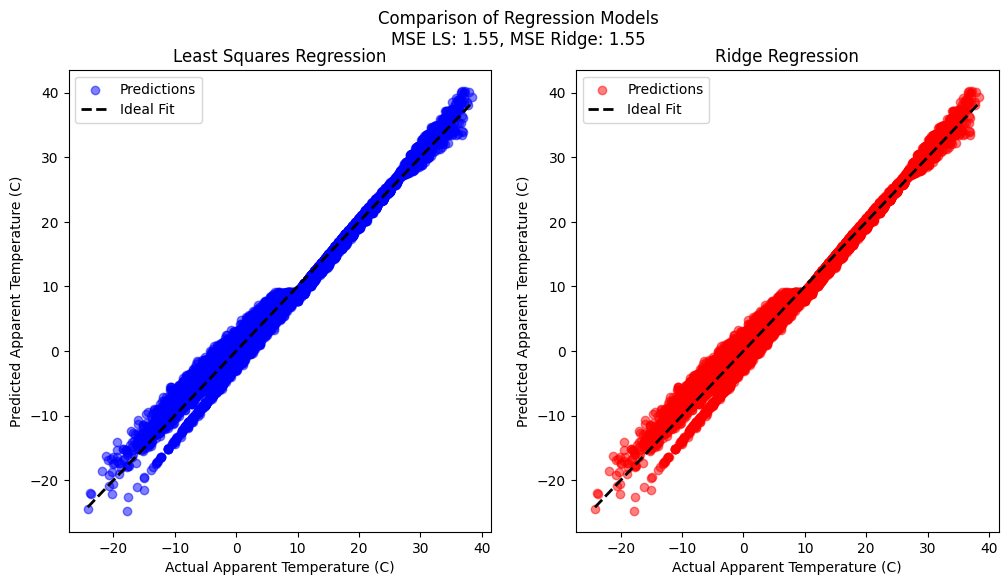

Mean Squared Error for Least Squares (LS): 1.5532
Mean Squared Error for Ridge Regression (RLS): 1.5532


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/weatherHistory.csv'
data = pd.read_csv(file_path)

# Prepare the data
X = data[['Temperature (C)', 'Humidity']]
y = data['Apparent Temperature (C)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model (Least Squares)
ls_model = LinearRegression()
ls_model.fit(X_train, y_train)
y_pred_ls = ls_model.predict(X_test)
mse_ls = mean_squared_error(y_test, y_pred_ls)

# Initialize and train the Ridge Regression model (Regularized Least Squares)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for Least Squares predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ls, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted Apparent Temperature (C)')
plt.title('Least Squares Regression')
plt.legend()

# Plot for Ridge Regression predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='red', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted Apparent Temperature (C)')
plt.title('Ridge Regression')
plt.legend()

plt.suptitle(f'Comparison of Regression Models\nMSE LS: {mse_ls:.2f}, MSE Ridge: {mse_ridge:.2f}')
plt.show()

# Output MSE for both models
print(f"Mean Squared Error for Least Squares (LS): {mse_ls:.4f}")
print(f"Mean Squared Error for Ridge Regression (RLS): {mse_ridge:.4f}")


                               WLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.987
Model:                                  WLS   Adj. R-squared:                  0.987
Method:                       Least Squares   F-statistic:                 7.316e+06
Date:                      Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                              16:37:28   Log-Likelihood:            -1.6837e+05
No. Observations:                     96453   AIC:                         3.367e+05
Df Residuals:                         96451   BIC:                         3.368e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

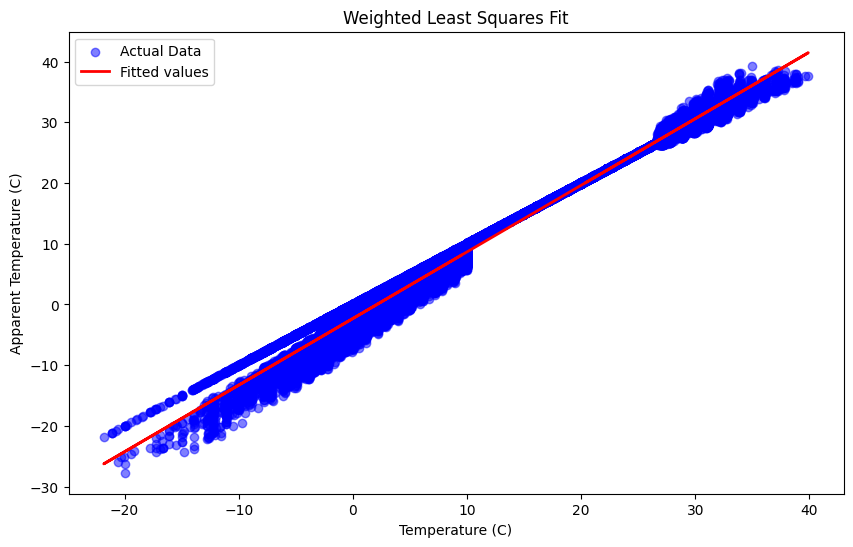

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = '/content/weatherHistory.csv'
data = pd.read_csv(file_path)

# Assume weights as the inverse of humidity and ensure no infinite or zero weights
X = data[['Temperature (C)']]
y = data['Apparent Temperature (C)']
weights = 1 / (data['Humidity'] + 0.01)  # Adding a small constant to avoid division by zero

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the Weighted Least Squares model
try:
    model = sm.WLS(y, X, weights=weights)
    results = model.fit()
    print(results.summary())

    # Plotting the fitted values
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Temperature (C)'], data['Apparent Temperature (C)'], color='blue', alpha=0.5, label='Actual Data')
    plt.plot(X['Temperature (C)'], results.fittedvalues, 'r', label='Fitted values', linewidth=2)
    plt.title('Weighted Least Squares Fit')
    plt.xlabel('Temperature (C)')
    plt.ylabel('Apparent Temperature (C)')
    plt.legend()
    plt.show()
except np.linalg.LinAlgError as e:
    print("Linear algebra error during the fit:", e)
except Exception as e:
    print("An error occurred:", e)
